In [96]:
import gdown
import zipfile
import os

file_id = "1dviMhTU9olu_AkMsDMf3xY3QtRIw_m2v"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)

zip_path = "/content/ai2.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

print(f"압축 해제 완료")

os.chdir("/content/ai2/ch05")

Downloading...
From (original): https://drive.google.com/uc?id=1dviMhTU9olu_AkMsDMf3xY3QtRIw_m2v
From (redirected): https://drive.google.com/uc?id=1dviMhTU9olu_AkMsDMf3xY3QtRIw_m2v&confirm=t&uuid=cf38e748-1aad-4c16-8a6f-feefadc33028
To: /content/ai2.zip
100%|██████████| 29.0M/29.0M [00:00<00:00, 59.0MB/s]


압축 해제 완료


In [ ]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [ ]:
class MulLayer:
    def __init__(self):
        print("MulLayer.__init__()")
        print(self)
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

In [ ]:
mul = MulLayer()
print(mul)

MulLayer.__init__()


In [ ]:
out = mul.forward(10, 5)
print(out)

50


In [ ]:
dx, dy = mul.backward(1.5)
print("dx=", dx)
print("dy=", dy)

dx= 7.5
dy= 15.0


In [ ]:
import os
import sys
sys.path.append(os.pardir)
from common.layers import *

apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

MulLayer.__init__()
MulLayer.__init__()
price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

MulLayer.__init__()
MulLayer.__init__()
MulLayer.__init__()
price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


### 렐루의 구현

In [8]:
x = np.array([1,2,3,4])
print(x)
y = x
print(y)
y[0] = 10
print(y)
print(x)

[1 2 3 4]
[1 2 3 4]
[10  2  3  4]
[10  2  3  4]


In [9]:
x = np.array([1,2,3,4])
print(x)
y = x.copy()
print(y)
y[0] = 10
print(y)
print(x)

[1 2 3 4]
[1 2 3 4]
[10  2  3  4]
[1 2 3 4]


In [16]:
import numpy as np

# x = np.array([1,-1,2,-2])
# print(x)

# dout = np.array([-3,3,3,3])


x = np.array([[1,-1,2,-2],
              [-1,1,-2,2]])

dout = np.array([[-3,3,3,3],
                 [4,4,4,-4]])

mask = (x<=0)
print(mask)
print(type(mask))
print(mask.shape)

out = x.copy()
out[ mask ] = 0
print(out)
print(x)

print(dout)
dout[ mask ] = 0
print(dout)

[[False  True False  True]
 [ True False  True False]]
<class 'numpy.ndarray'>
(2, 4)
[[1 0 2 0]
 [0 1 0 2]]
[[ 1 -1  2 -2]
 [-1  1 -2  2]]
[[-3  3  3  3]
 [ 4  4  4 -4]]
[[-3  0  3  0]
 [ 0  4  0 -4]]


In [17]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):    # foo( const char *x )
        self.mask = (x<=0)
        # print(self.mask)
#         out = x
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout;
        return dx

In [19]:
import numpy as np
r1 = Relu()
x = np.array([1,-1,2,-2])
y = r1.forward(x)
print(y)
# print(x)
dx = r1.backward(np.array([3,3,3,3]))
print(dx)

[False  True False  True]
[1 0 2 0]
[3 0 3 0]


In [20]:
import numpy as np
r1 = Relu()
x = np.array([[1,-1],
              [2,-2]])
y = r1.forward(x)
print(y)
dx = r1.backward(np.array([[-3,3],
                           [3,-3]]))
print(dx)

[[False  True]
 [False  True]]
[[1 0]
 [2 0]]
[[-3  0]
 [ 3  0]]


### Sigmoid 계층 구현

In [23]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/(1+np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout*self.out*(1.0-self.out);
        return dx

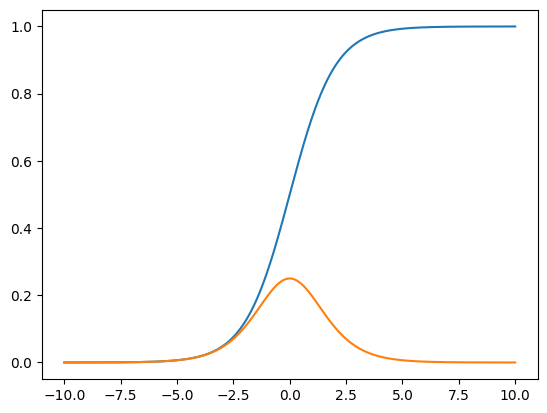

In [26]:
import matplotlib.pyplot as plt

sigmoid = Sigmoid()
x = np.linspace(-10,10,1000)
y = sigmoid.forward(x)
plt.plot(x,y)
dx = sigmoid.backward(1)
plt.plot(x,dx)
plt.show()

In [28]:
s1 = Sigmoid()
x = np.array([-2,-1,10,0])
y = s1.forward(x)
print(y)
dx = s1.backward(np.array([30,30,30,30]))
print(dx)

[0.11920292 0.26894142 0.9999546  0.5       ]
[3.14980756e+00 5.89835800e+00 1.36187423e-03 7.50000000e+00]


### Affine 계층

### 브로드 캐스트

In [29]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = a+b
print(c)

[5 7 9]


In [30]:
a = np.array([1,2,3])
b = np.array([4,5])
c = a+b
print(c)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [31]:
a = np.array([1,2,3])
b = 4      # [4,4,4]
c = a+b
print(c)

[5 6 7]


In [32]:
a = np.array([[1,2],
              [3,4]])  # (2,2)
b = 4      # [[4,4],[4,4]] () => (2,2)
c = a+b
print(c)

[[5 6]
 [7 8]]


In [33]:
a = np.array([[1,2],
              [3,4]])
b = np.array([1,2]) # [[1,2],[1,2]] (2,) => (2,2)
c = a+b
print(c)

[[2 4]
 [4 6]]


In [35]:
X = np.random.rand(2,)
W = np.random.rand(2,3)
B = np.random.rand(3)
print(X.shape)
print(W.shape)
print(B.shape)

Y = np.dot(X, W) + B
print(Y.shape)

(2,)
(2, 3)
(3,)
(3,)


In [36]:
X = np.random.rand(5,2)
W = np.random.rand(2,3)
B = np.random.rand(3)
print(X.shape)
print(W.shape)
print(B.shape)

Y = np.dot(X, W) + B  # (5,2)(2,3)+(3,)
print(Y.shape)

(5, 2)
(2, 3)
(3,)
(5, 3)


In [37]:
X = np.array([1,2])
W = np.array([[1,1,1],
              [2,2,2]])  #(2,)(2,3)

Y = np.dot(X, W)
print(Y.shape)

(3,)


In [42]:
X  = np.array([1,2])   # (2,)  => (2,1)
dY = np.array([1,1,1]) # (3,)

print(X.T.shape)
print(X.T)
print(dY.shape)
dW = np.dot(X.T, dY) # (2,)(3,)
print(dW.shape)

(2,)
[1 2]
(3,)


ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

In [46]:
X  = np.array([1,2])    # (2,)
W = np.array([[1,1,1],
              [2,2,2]])

dy  = np.array([[1,1,1]]) # (1,3)

X = X.reshape(-1, X.shape[0])  # (1,2)
print(X.shape)

Y = np.dot(X, W)  #(1,2)(2,3) => (1,3)
print(Y.shape)

print(X.T.shape)  # (2,1)

dw = np.dot(X.T, dy)  #(2,1)(1,3) => (2,3)
print(dw.shape)

(1, 2)
(1, 3)
(2, 1)
(2, 3)


In [53]:
a = 10,20
print(type(a))

<class 'tuple'>


In [56]:
a,b = (10,20)
print(type(a), type(b))

SyntaxError: can't use starred expression here (<ipython-input-56-7e467fdd0b72>, line 1)

In [49]:
def foo():
    return 10,20

a,b = foo()
print(a,b)

10 20


In [60]:
def foo(a):
    print(type(a),a)

foo((10,20))

<class 'tuple'> (10, 20)


In [62]:
def foo(a,b=30):
    print(type(a),a)
    print(type(b),b)

foo(*(10,20))

<class 'int'> 10
<class 'int'> 20


In [63]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.X = None
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        if x.ndim == 1 :
            x = x.reshape(-1, x.shape[0])  #(2,) => (2,1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout) # (2,1)(1,3) => (2,3)
        self.db = np.sum(dout, axis=0)
                          # (2,) => 2   (2,2) => 2, 2
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx

In [66]:
W = np.array([[1,1,1],[2,2,2]]) # (2,3)
b = np.array([1,1,1])           # (3,)
a1 = Affine(W, b)
X = np.array([1,1])             # (2,)
Y = a1.forward(X)               # (1,2)(2,3) + (3,) => (1,3)
print(Y.shape)
dout=([[1,1,1]])                # (1,3)
dx = a1.backward(dout)          # (1,3)(3,2) => (1,2) => (2,)
print(dx.shape)
print(a1.dW.shape)                    # (2,1)(1,3) => (2,3)
print(a1.db.shape)                    # np.sum(dout, axis=0) => (1,3) => (3,)

(1, 3)
(2,)
(2, 3)
(3,)


In [67]:
W = np.array([[1,1,1],[2,2,2]])
b = np.array([1,1,1])
a1 = Affine(W, b)
X = np.array([[1,1],[2,2]])
Y = a1.forward(X)
print(Y)
dout=([[1,1,1],[1,1,1]])
dx = a1.backward(dout)
print(dx)
print(a1.dW)
print(a1.db)

[[4 4 4]
 [7 7 7]]
[[3 6]
 [3 6]]
[[3 3 3]
 [3 3 3]]
[2 2 2]


### Softmax With Loss

In [68]:
def softmax(x):
    if x.ndim == 2:
        x = x - np.max(x, axis=1).reshape(-1,1)
        y = np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1,1)
        return y

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [69]:
x = np.array([10,9,8])
y = softmax(x)
print(y.shape)
print(y)

(3,)
[0.66524096 0.24472847 0.09003057]


In [71]:
# x = np.array([[10,9,8],
#               [ 4,6,5]])
x = np.array([[1000,1002,1003],
              [2000,2003,2002]])
y = softmax(x)
print(y.shape)
print(y)

(2, 3)
[[0.03511903 0.25949646 0.70538451]
 [0.03511903 0.70538451 0.25949646]]


In [72]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [74]:
# x = np.array([[10,9,8],
#               [ 4,6,5]])
x = np.array([[1000,1002,1003],
              [2000,2003,2002]])
y = softmax(x)
print(y.shape)
print(y)

(2, 3)
[[0.03511903 0.25949646 0.70538451]
 [0.03511903 0.70538451 0.25949646]]


In [75]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size  # 0.0000001

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        print(self.y)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

In [83]:
y = np.array([[0.2, 0.1, 0.7]]) # (1,3)
# t = np.array([[0,0,1]])         # (1,3)
t = np.array([2])
# print(t.size)
loss = cross_entropy_error(y, t)
print(loss)

0.3566748010815999


In [87]:
y = np.array([[0.2, 0.7, 0.1],
              [0.8, 0.1, 0.1]])
# t = np.array([[1,0,0],
#               [0,1,0]])
t = np.array([0,1])
loss = cross_entropy_error(y, t)
print(loss)

1.9560107527143855


In [89]:
x = np.array([[2.20,1.39,0.85]])
# t = np.array([[0,1,0]])
t = np.array([1])
swl = SoftmaxWithLoss()
loss = swl.forward(x, t)
print(loss)
dx = swl.backward()
print(dx)

[[0.5868206  0.26105188 0.15212752]]
1.3430357472383085
[[-0.4131794  -0.73894812 -0.84787248]]


In [90]:
x = np.array([[2.20,1.39,0.85]])
t = np.array([[1,0,0]])
swl = SoftmaxWithLoss()
loss = swl.forward(x, t)
print(loss)
dx = swl.backward()
print(dx)

[[0.5868206  0.26105188 0.15212752]]
0.5330359598940407
[[-0.4131794   0.26105188  0.15212752]]


In [95]:
x = np.array([[2.20,1.39,0.85],
              [0.85,2.20,1.39]])
t = np.array([[0,1,0],
              [0,0,1]])
# t = np.array([1,2])
swl = SoftmaxWithLoss()
loss = swl.forward(x, t)
print(loss)
dx = swl.backward()
print(dx)

[[0.5868206  0.26105188 0.15212752]
 [0.15212752 0.5868206  0.26105188]]
1.3430357472383085
[[ 0.2934103  -0.36947406  0.07606376]
 [ 0.07606376  0.2934103  -0.36947406]]


In [ ]:
def foo():
    return 1,2

a,b = foo()

In [ ]:
# AAA *ap = new AAA()
# delete ap

In [ ]:
# {
#     sp<AAA> sp2
#     {
#         sp<AAA> sp1 = new AAA()
#         sp2 = sp1
#     }
# }

In [111]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
#         print('TwoLayerNet.__init__()')
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        # print('TwoLayerNet.predict()')
        for layer in self.layers.values():
            # print(x.shape)
            x = layer.forward(x)
        # print(x.shape)
        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        # print('TwoLayerNet.loss()')
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # print('TwoLayerNet.gradient()')
        # forward
        loss = self.loss(x, t)
        # print(loss)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        # print('   t[0]=' , t[0])
        # print('dout[0]=' , dout[0])

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            # print("dout.shape=",dout.shape )
            dout = layer.backward(dout)
        # print("dout.shape=",dout.shape )

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [104]:
x = np.arange(20)
for i in range(4):
    batch_mask = np.random.choice(20, 20,replace=False)
    print(batch_mask)
    x_b = x[batch_mask]
    print(x_b)

[ 0  7  6  5 16 14  8 10 19 13  1 17 18 12  9  2 11  3 15  4]
[ 0  7  6  5 16 14  8 10 19 13  1 17 18 12  9  2 11  3 15  4]
[ 3  4  5  9  8 13  7  1  0  2 16 14 18  6 12 17 15 11 10 19]
[ 3  4  5  9  8 13  7  1  0  2 16 14 18  6 12 17 15 11 10 19]
[ 6 13 16  8 18  3 14 11 10  5 19  0 15 12  1 17  9  4  2  7]
[ 6 13 16  8 18  3 14 11 10  5 19  0 15 12  1 17  9  4  2  7]
[16  0 14  7 11  8 18 13  5  1 10 17  6 12  9 19  3  2 15  4]
[16  0 14  7 11  8 18 13  5  1 10 17  6 12  9 19  3  2 15  4]


In [99]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)
print(t_train[0])

(60000, 784)
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [137]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
# for i in range(1):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # print("x_batch.shape=",x_batch.shape)
    # print("t_batch.shape=",t_batch.shape)

    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)

    # break
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

KeyboardInterrupt: 

## test 데이터셋을 이용한 predict 실습

샘플이 한개인 경우

예측 :  2
정답 :  8


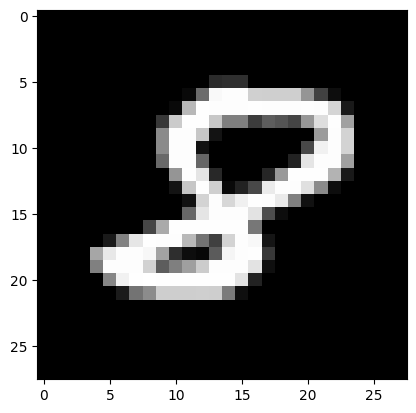

In [125]:
import matplotlib.pyplot as plt

for i in range(10000):
    x = x_test[i].reshape(1,-1)
    # print(x.shape)
    pred = network.predict(x)
    # print(pred)
    if np.argmax(pred) != np.argmax(t_test[i]):
        print("예측 : ", np.argmax(pred))
        # t_test[0]
        print("정답 : ",np.argmax(t_test[i]))
        # plt.subplot(2,5,i+1)
        plt.imshow(x_test[i].reshape(28,28),cmap='gray')
        plt.show()
        break



샘플이 여러개인 경우

In [135]:
x = x_test[:100]
t = t_test[:100]
x.shape

pred = network.predict(x)
pred.shape

# print(np.argmax(pred, axis=1))
# print(np.argmax(t, axis=1))

np.sum(np.argmax(pred, axis=1) == np.argmax(t, axis=1))/10

np.float64(9.9)

### 딥러닝 모델을 검증하는 코드

In [138]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:4.743751990749346e-10
b1:2.845388074947412e-09
W2:6.065534151688352e-09
b2:1.3974504008557042e-07
